In [27]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(corrplot)
library(ade4)

In [2]:
# Importing the dataset
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results/ps.merged")

In [3]:
# Pulling out samples from this project only
ps.org = prune_samples(sample_data(ps)$Org_or_Min %in% c("O"), ps)
ps.min = prune_samples(sample_data(ps)$Org_or_Min %in% c("M"), ps)
ps.org.merged = merge_samples(ps.org, "Site_ID")
ps.min.merged = merge_samples(ps.min, "Site_ID")
ps.org.merged.norm = transform_sample_counts(ps.org.merged, function(x) x / sum(x) )
ps.min.merged.norm = transform_sample_counts(ps.min.merged, function(x) x / sum(x) )

In [4]:
Dist.org.mb = as.matrix(distance(ps.org.merged.norm, method="bray", type="samples"))
Dist.min.mb = as.matrix(distance(ps.min.merged.norm, method="bray", type="samples"))

In [5]:
Dist.veg = read.csv("../../../../../../../Users/Thea/Documents/Madison/Box\ Sync/WhitmanLabMaster/WhitmanLab/Projects/WoodBuffalo/WB2015/data/Veg_properties/WBNPNWT_Vegetation_Braydistance_2015.csv")
row.names(Dist.veg)=Dist.veg$X
Dist.veg=Dist.veg[,2:dim(Dist.veg)[2]]
colnames(Dist.veg)=row.names(Dist.veg)

In [6]:
OrgSamples = colnames(as.matrix(Dist.org.mb))[colnames(as.matrix(Dist.org.mb)) %in% colnames(as.matrix(Dist.veg))]
MinSamples = colnames(as.matrix(Dist.min.mb))[colnames(as.matrix(Dist.min.mb)) %in% colnames(as.matrix(Dist.veg))]

In [7]:
Dist.org.veg = Dist.veg[row.names(Dist.veg) %in% OrgSamples,colnames(Dist.veg) %in% OrgSamples]
Dist.min.veg = Dist.veg[row.names(Dist.veg) %in% MinSamples,colnames(Dist.veg) %in% MinSamples]
Dist.org.mb = Dist.org.mb[row.names(Dist.org.mb) %in% OrgSamples,colnames(Dist.org.mb) %in% OrgSamples]
Dist.min.mb = Dist.min.mb[row.names(Dist.min.mb) %in% MinSamples,colnames(Dist.min.mb) %in% MinSamples]

In [8]:
colnames(Dist.org.mb) == colnames(Dist.org.veg)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE

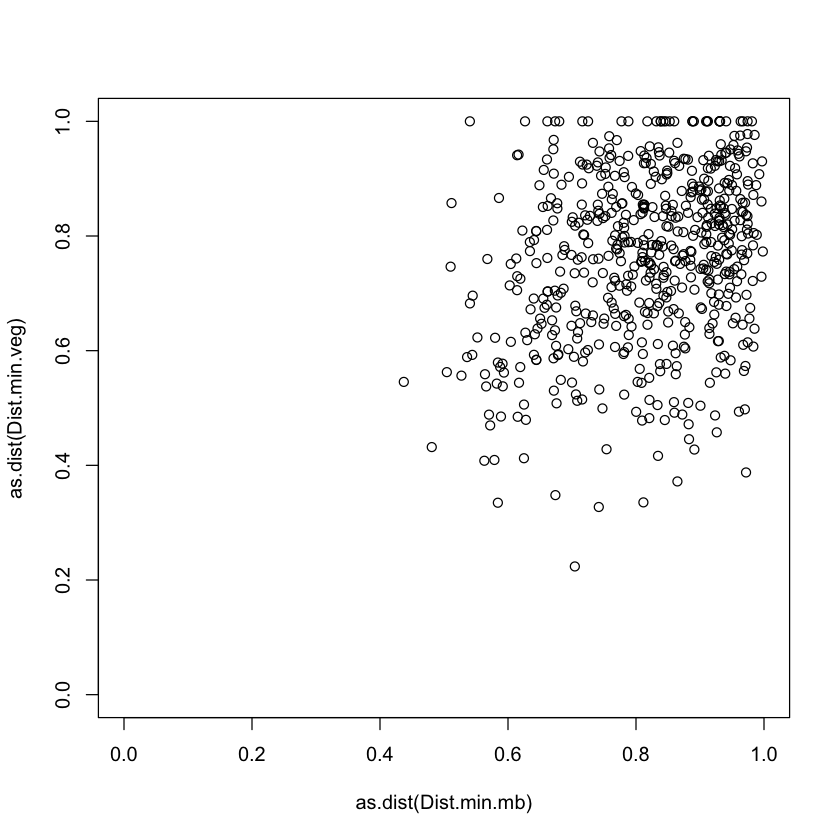

In [10]:
plot(as.dist(Dist.min.mb),as.dist(Dist.min.veg),xlim=c(0,1), ylim=c(0,1))
# colour by distance matrix of burn severity metrics
# colour by distnace matrix of soils

### Mantel tests

In [24]:
Uplands = sample_data(ps)[sample_data(ps)$Land_Class=="Upland"]$Site_ID
Wetlands = sample_data(ps)[sample_data(ps)$Land_Class=="Wetland"]$Site_ID

In [25]:
Dist.org.veg.up =Dist.org.veg[row.names(Dist.org.veg) %in% Uplands ,colnames(Dist.org.veg) %in% Uplands]
Dist.min.veg.up =Dist.min.veg[row.names(Dist.min.veg) %in% Uplands ,colnames(Dist.min.veg) %in% Uplands]
Dist.org.mb.up =Dist.org.mb[row.names(Dist.org.mb) %in% Uplands ,colnames(Dist.org.mb) %in% Uplands]
Dist.min.mb.up =Dist.min.mb[row.names(Dist.min.mb) %in% Uplands ,colnames(Dist.min.mb) %in% Uplands]
Dist.org.veg.wet =Dist.org.veg[row.names(Dist.org.veg) %in% Wetlands ,colnames(Dist.org.veg) %in% Wetlands]
Dist.min.veg.wet =Dist.min.veg[row.names(Dist.min.veg) %in% Wetlands ,colnames(Dist.min.veg) %in% Wetlands]
Dist.org.mb.wet =Dist.org.mb[row.names(Dist.org.mb) %in% Wetlands ,colnames(Dist.org.mb) %in% Wetlands]
Dist.min.mb.wet =Dist.min.mb[row.names(Dist.min.mb) %in% Wetlands ,colnames(Dist.min.mb) %in% Wetlands]

In [28]:
mantel.rtest(m1 = as.dist(Dist.org.veg.up), m2 = as.dist(Dist.org.mb.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.08875524 

Based on 9999 replicates
Simulated p-value: 0.1288 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 1.1264923271 -0.0002155186  0.0062378959 

In [29]:
mantel.rtest(m1 = as.dist(Dist.org.veg.wet), m2 = as.dist(Dist.org.mb.wet), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.6182917 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
4.4995831410 0.0002549967 0.0188661801 

In [30]:
mantel.rtest(m1 = as.dist(Dist.min.veg.up), m2 = as.dist(Dist.min.mb.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.2920177 

Based on 9999 replicates
Simulated p-value: 5e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
3.526626e+00 8.407093e-05 6.852507e-03 

In [31]:
mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.mb.wet), nrepet = 9999)

Monte-Carlo test
Call: mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.mb.wet), 
    nrepet = 9999)

Observation: -0.9281409 

Based on 9999 replicates
Simulated p-value: 1 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
-1.308357537 -0.002573413  0.500452973 

In [33]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps)[!duplicated(sample_data(ps)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [38]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")

for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}

head(df)

Site_ID_1,Site_ID_2,Mb_dist,Veg_dist,Land_Class_1
15S-NT-19,15S-NT-19,0.0000000,0.0000000,Wetland
15S-NT-20,15S-NT-19,0.7032652,0.9058208,Wetland
15S-NT-21,15S-NT-19,0.6677345,0.7269458,Wetland
15S-NT-22,15S-NT-19,0.9649712,0.8454632,Upland
15S-NT-23,15S-NT-19,1.0000000,0.7812358,Upland
15S-NT-24,15S-NT-19,0.9657845,0.7701833,Upland


In [39]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in paste(df$Site_ID_1)){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2




# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Site_ID_1){
    df$Severity_Class_1[df$Site_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Severity_Class_2[df$Site_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Low", "Moderate", "High","Different"))

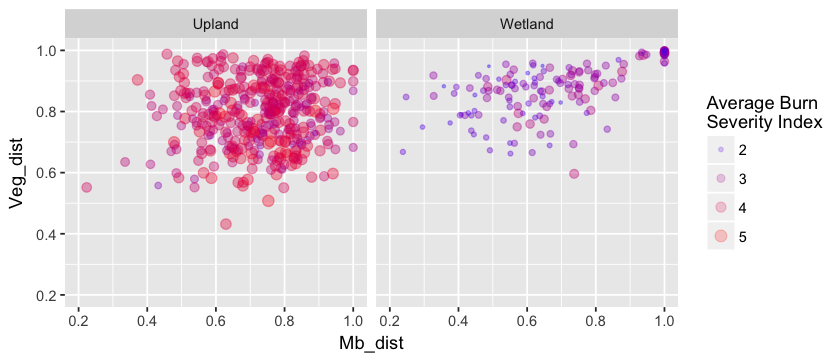

In [40]:
options(repr.plot.width=7, repr.plot.height=3)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Land_Class!= "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_Mean, size=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=0.2) + scale_color_gradient(low="blue",high="red")
p = p + facet_wrap(~Land_Class) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + scale_size(range=c(0,3))
#p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p = p + guides(color=guide_legend(title="Average Burn\nSeverity Index"),size=guide_legend(title="Average Burn\nSeverity Index"))
#p = p + geom_abline(intercept=0,slope=1, linetype=2)
p

### Initial investigations

In [11]:
c = cor(Dist.org.mb,Dist.org.veg,method="pearson")

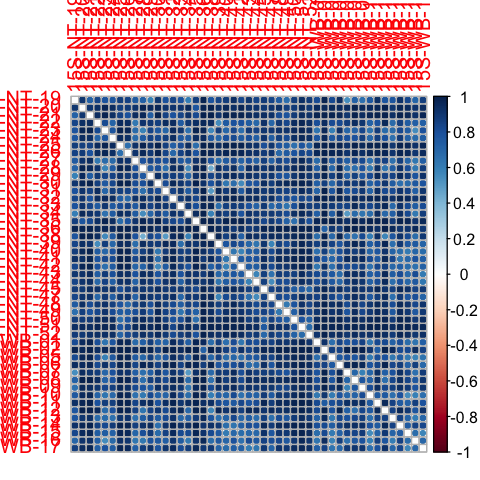

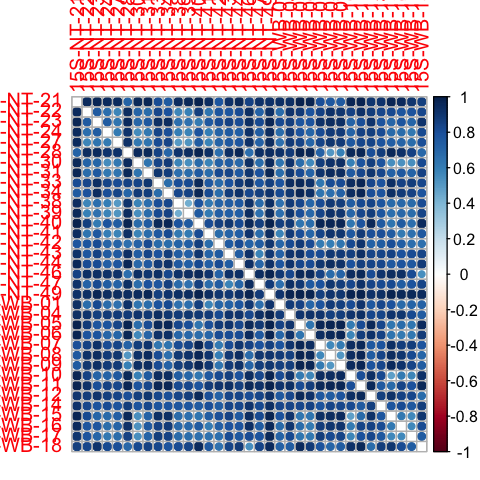

In [12]:
options(repr.plot.width=4, repr.plot.height=4)
corrplot(as.matrix(Dist.org.mb),method="circle")
corrplot(as.matrix(Dist.min.mb),method="circle")

In [13]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps)[!duplicated(sample_data(ps)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [14]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2




# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2


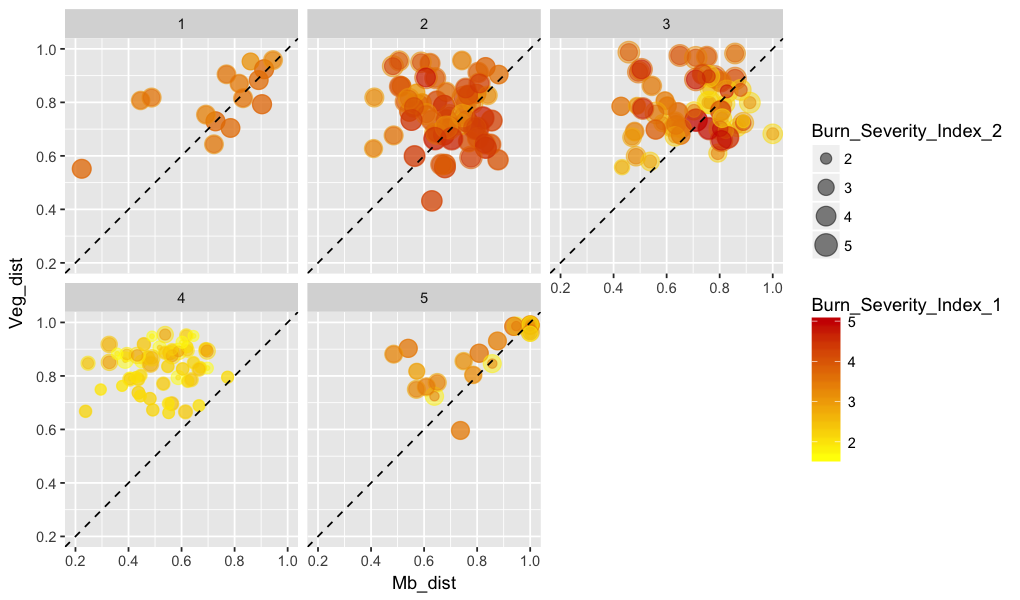

In [15]:
options(repr.plot.width=8.5, repr.plot.height=5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Veg_Comm != "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_1, size=Burn_Severity_Index_2))
p = p + geom_point(alpha=0.5) + scale_color_gradient(low="yellow",high="red3")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

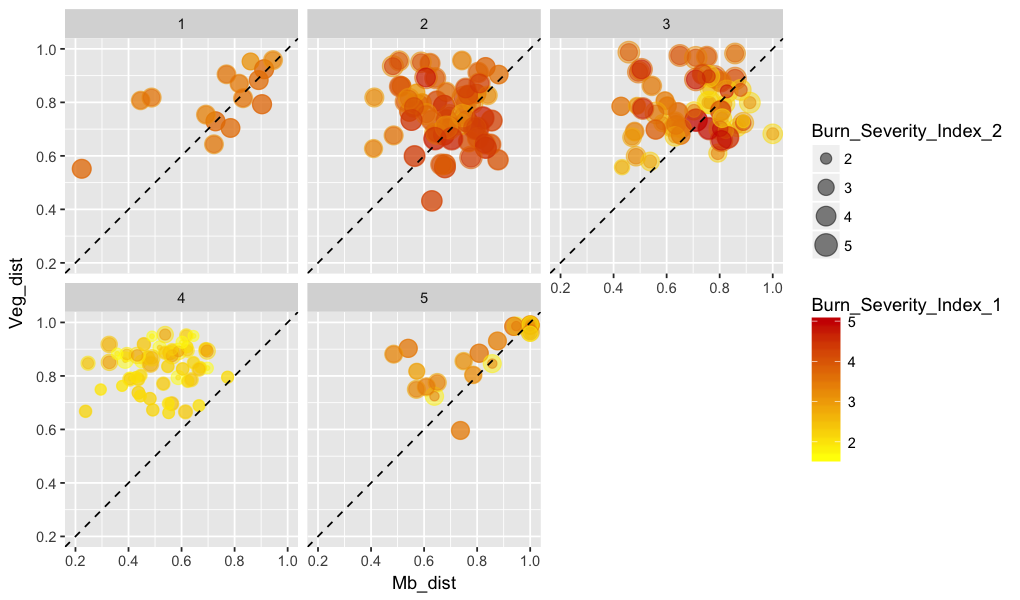

In [16]:
options(repr.plot.width=8.5, repr.plot.height=5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Veg_Comm != "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_1, size=Burn_Severity_Index_2))
p = p + geom_point(alpha=0.5) + scale_color_gradient(low="yellow",high="red3")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

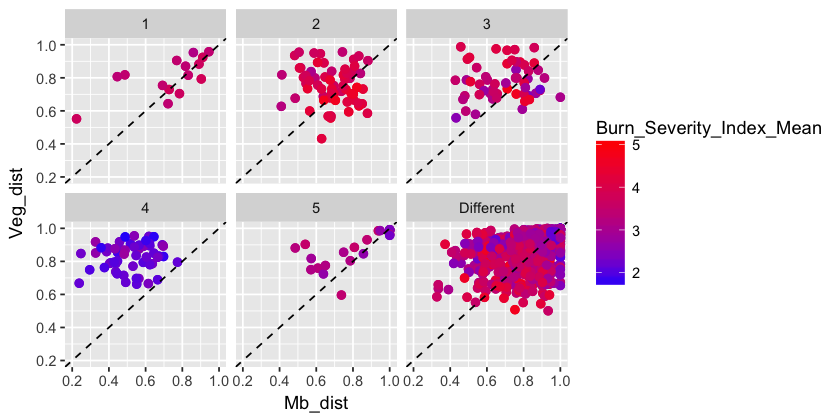

In [17]:
options(repr.plot.width=7, repr.plot.height=3.5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=1, size=2) + scale_color_gradient(low="blue",high="red")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

Warning message:
“Removed 273 rows containing missing values (geom_point).”

Warning message:
“Removed 273 rows containing missing values (geom_point).”

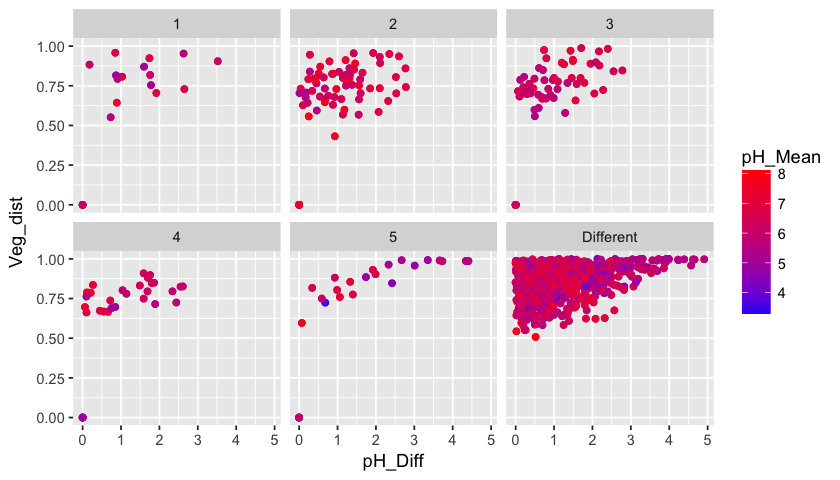

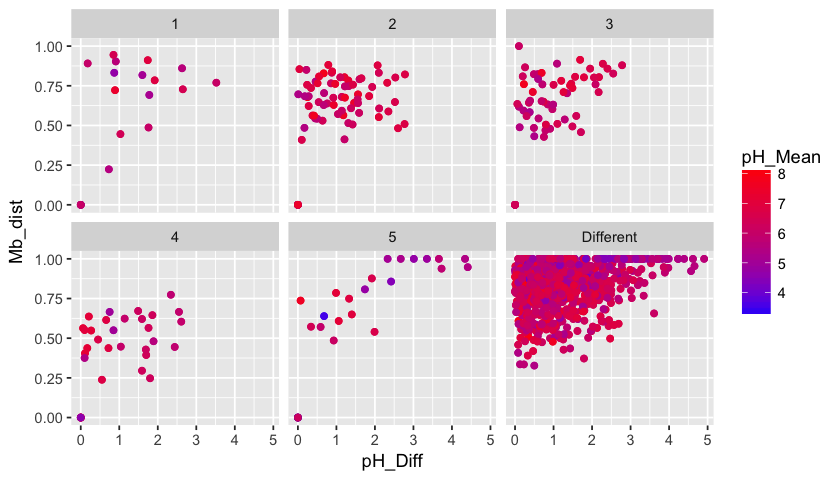

In [18]:
options(repr.plot.width=7, repr.plot.height=4)


p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Veg_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Mb_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

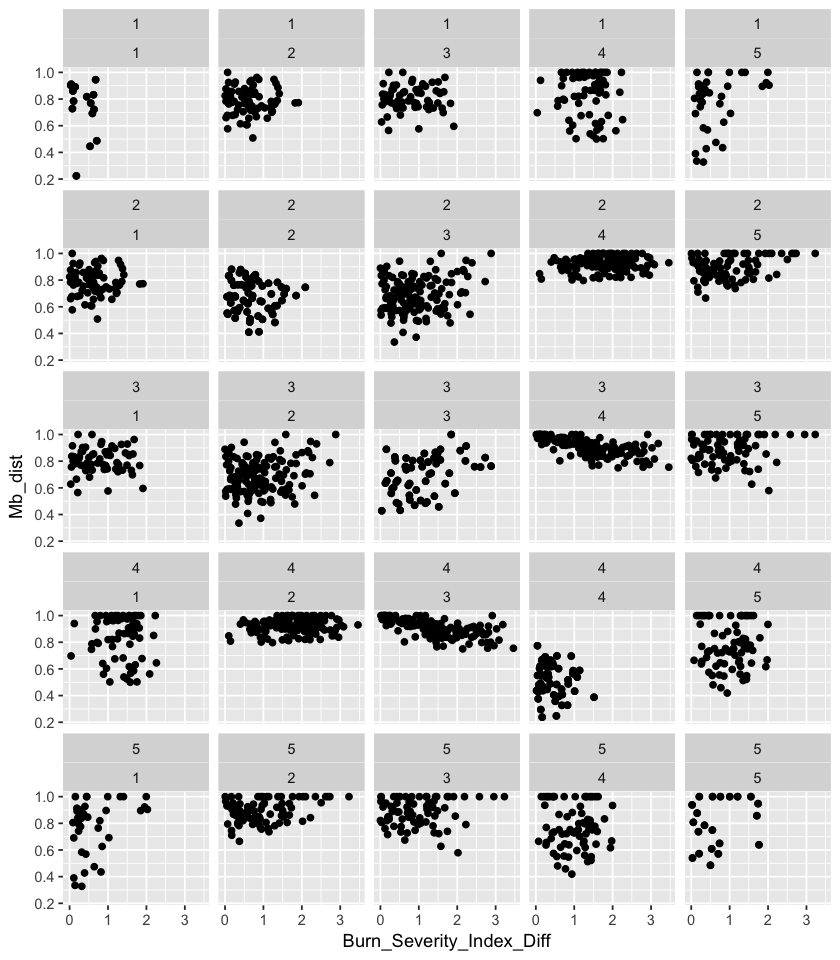

In [19]:
options(repr.plot.width=7, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0,aes(y=Mb_dist, x=Burn_Severity_Index_Diff))
p = p + geom_point()
p = p + facet_wrap(~Veg_Comm_1~Veg_Comm_2) + scale_color_gradient(low="blue",high="red")
p

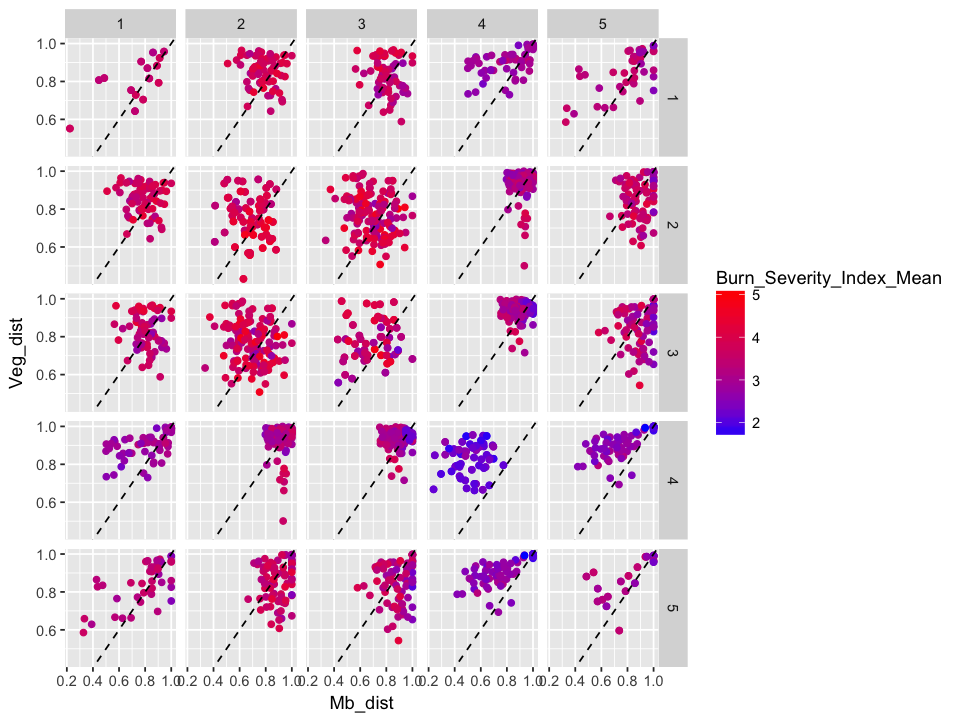

In [20]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)
p = ggplot(df.no0, aes(x = Mb_dist, y=Veg_dist, color=Burn_Severity_Index_Mean))
#p = ggplot(df.no0, aes(x = Mb_dist, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_point() + scale_color_gradient(low="blue",high="red")
#p = p + scale_color_manual(values=c("red","yellow","orange"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

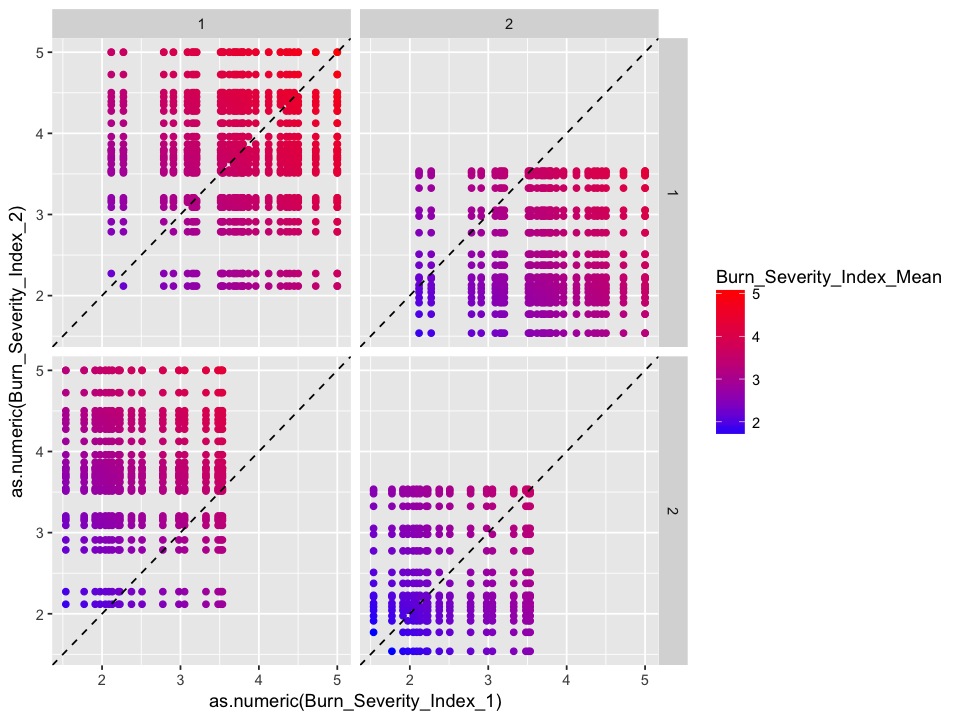

In [21]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = as.numeric(Burn_Severity_Index_1), y=as.numeric(Burn_Severity_Index_2), color=Burn_Severity_Index_Mean))
p = p + geom_point() + scale_color_gradient(low="blue",high="red")
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p



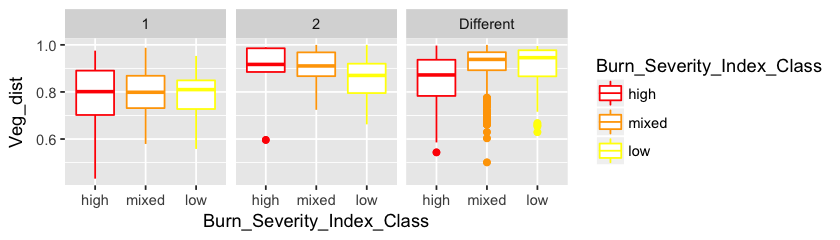

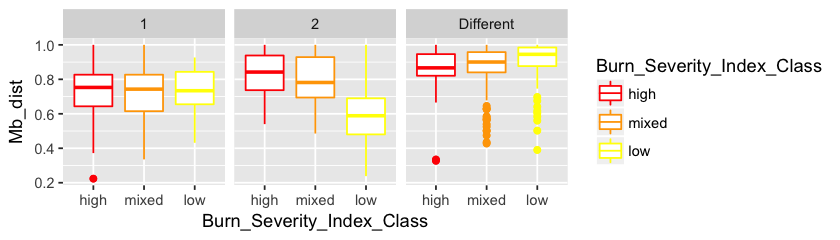

In [22]:
options(repr.plot.width=7, repr.plot.height=2)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Mb_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

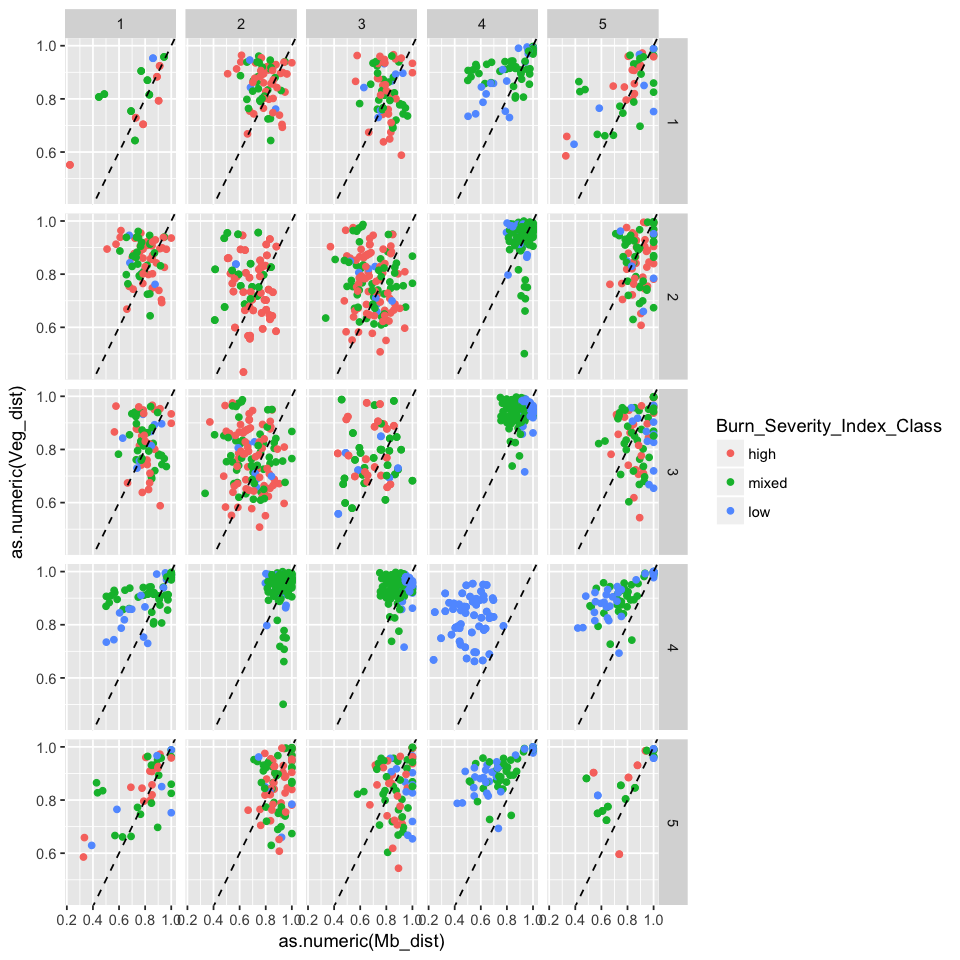

In [23]:
options(repr.plot.width=8, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(y = as.numeric(Veg_dist), x=as.numeric(Mb_dist), color=Burn_Severity_Index_Class))
p = p + geom_point() #+ scale_color_gradient(low="blue",high="red")
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p
